# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [16]:
#Import all the required libraries
import string 

import pandas as pd
import numpy as np

from collections import Counter
import os
import glob
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras import Model
import time
import collections
import random

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [17]:
cwd = os.getcwd()
images_dir = os.path.join(cwd, 'archive')
images_dir = os.path.join(images_dir, 'images')
images_dir

'C:\\Users\\eakmhna\\Eye For Blind\\archive\\images'

In [18]:
#Import the dataset and read the image into a seperate variable

images=images_dir

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


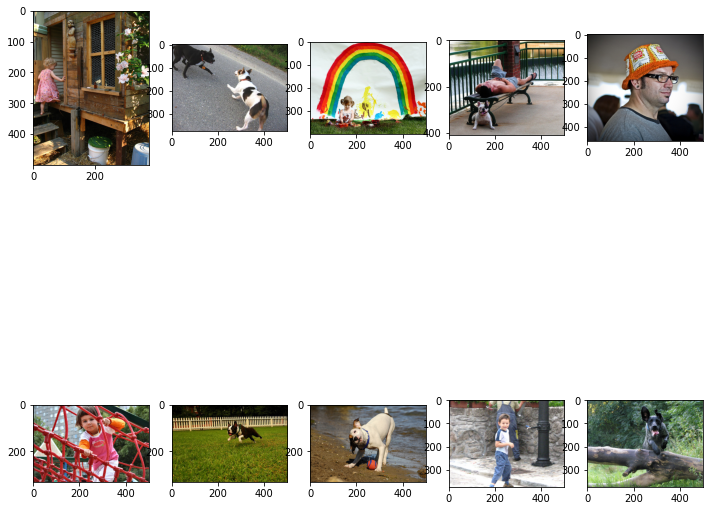

In [19]:
#Visualise both the images & text present in the dataset
fig, ax = plt.subplots(2,5, figsize=(12, 12))
row = 0
col = 0 
ax = ax.flatten()
for img, axs in zip(all_imgs[0:10], ax):
    image = plt.imread(img)
    axs.imshow(image)
plt.show()

In [20]:
text_file = os.path.join(cwd, 'archive')
text_file = os.path.join(text_file, 'captions.txt')

In [21]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    #your code here
    file = open(filename, "r")
    text = file.read()
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [22]:
caption_df = pd.read_csv(text_file, sep=",")
caption_df['img_path'] = caption_df["image"].apply(lambda row: os.path.join(images_dir, row))

In [23]:
caption_df.head()

,image,caption,img_path
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,C:\Users\eakmhna\Eye For Blind\archive\images\...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,C:\Users\eakmhna\Eye For Blind\archive\images\...
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,C:\Users\eakmhna\Eye For Blind\archive\images\...
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,C:\Users\eakmhna\Eye For Blind\archive\images\...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,C:\Users\eakmhna\Eye For Blind\archive\images\...


In [24]:
all_img_id= caption_df["image"] #store all the image id here
all_img_vector= caption_df['img_path'] #store all the image path here
annotations=  caption_df["caption"] #store all the captions here

In [25]:
#Create the vocabulary & the counter for the captions
def create_vocabulary():
    vocabulary = []
    for caption in caption_df.caption.values:
        vocabulary.extend(caption.split())
    print("len of vocabulary is %s" %(len(set(vocabulary))))
    return set(vocabulary)

vocabulary= create_vocabulary() #write your code here

val_count=Counter(vocabulary)
val_count

len of vocabulary is 9630


Counter({'belly-surfing': 1,
         'fake': 1,
         'slicker': 1,
         'lush': 1,
         'wall': 1,
         'seesaw': 1,
         'medium-sized': 1,
         'uptop': 1,
         'nipples': 1,
         'chewed': 1,
         'puffs': 1,
         'sashes': 1,
         'headlong': 1,
         'Israel': 1,
         'knelt': 1,
         'taken': 1,
         'shot': 1,
         'charged': 1,
         'cannon': 1,
         'Rowers': 1,
         'colorings': 1,
         'pontoon': 1,
         'strains': 1,
         'Beagle': 1,
         'dojo': 1,
         'equpiment': 1,
         'horseriders': 1,
         'picure': 1,
         'skimpy': 1,
         'vacation': 1,
         'stretcher': 1,
         'tychy': 1,
         'sculpture': 1,
         'Boats': 1,
         'foreigners': 1,
         'labs': 1,
         'Pictures': 1,
         'puppies': 1,
         'yet': 1,
         'clowds': 1,
         'would': 1,
         'machines': 1,
         'balances': 1,
         'powdery': 1,
   

In [26]:
#Visualise the top 30 occuring words in the captions
#write your code here
val_count.most_common(30)

[('belly-surfing', 1),
 ('fake', 1),
 ('slicker', 1),
 ('lush', 1),
 ('wall', 1),
 ('seesaw', 1),
 ('medium-sized', 1),
 ('uptop', 1),
 ('nipples', 1),
 ('chewed', 1),
 ('puffs', 1),
 ('sashes', 1),
 ('headlong', 1),
 ('Israel', 1),
 ('knelt', 1),
 ('taken', 1),
 ('shot', 1),
 ('charged', 1),
 ('cannon', 1),
 ('Rowers', 1),
 ('colorings', 1),
 ('pontoon', 1),
 ('strains', 1),
 ('Beagle', 1),
 ('dojo', 1),
 ('equpiment', 1),
 ('horseriders', 1),
 ('picure', 1),
 ('skimpy', 1),
 ('vacation', 1)]

In [27]:
caption_df.head()

,image,caption,img_path
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,C:\Users\eakmhna\Eye For Blind\archive\images\...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,C:\Users\eakmhna\Eye For Blind\archive\images\...
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,C:\Users\eakmhna\Eye For Blind\archive\images\...
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,C:\Users\eakmhna\Eye For Blind\archive\images\...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,C:\Users\eakmhna\Eye For Blind\archive\images\...


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [28]:
def remove_punctuations(text):
    text_without_punctuation = text.translate(string.punctuation)
    return text_without_punctuation

def remove_numeric(text):
    text_without_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if isalpha:
            text_without_numeric += " " + word
    return text_without_numeric

def remove_single_len_words(text):
    text_len_grt_than_1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_grt_than_1 += " " + word
    return text_len_grt_than_1 

def clean_text(text):
    enriched_text = remove_punctuations(text)
    enriched_text = remove_single_len_words(enriched_text)
    enriched_text = remove_numeric(enriched_text)
    return enriched_text

In [29]:
for i, captions in enumerate(caption_df['caption'].values):
    newcaption = clean_text(captions)
    caption_df["caption"].iloc[i] = newcaption

In [30]:
#Create a list which contains all the captions
annotations= caption_df['caption'].tolist() #write your code here

#add the <start> & <end> token to all those captions as well
caption_df['caption'] = caption_df['caption'].apply(lambda row: '<start> ' + row.lower() + ' <end>')

#Create a list which contains all the path to the images
all_img_path = caption_df['img_path'].tolist() #write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [31]:
caption_df.head()

,image,caption,img_path
0,1000268201_693b08cb0e.jpg,<start> child in pink dress is climbing up se...,C:\Users\eakmhna\Eye For Blind\archive\images\...
1,1000268201_693b08cb0e.jpg,<start> girl going into wooden building <end>,C:\Users\eakmhna\Eye For Blind\archive\images\...
2,1000268201_693b08cb0e.jpg,<start> little girl climbing into wooden play...,C:\Users\eakmhna\Eye For Blind\archive\images\...
3,1000268201_693b08cb0e.jpg,<start> little girl climbing the stairs to he...,C:\Users\eakmhna\Eye For Blind\archive\images\...
4,1000268201_693b08cb0e.jpg,<start> little girl in pink dress going into ...,C:\Users\eakmhna\Eye For Blind\archive\images\...


In [32]:
# create the tokenizer
vocabulary = create_vocabulary()

#your code here
num_word = 5000
tokenizer=Tokenizer(num_words=num_word,filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',oov_token='<unk>')

tokenizer.fit_on_texts(caption_df['caption'].tolist())
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

# creating tokenized vectors
caption_sequence = tokenizer.texts_to_sequences(caption_df['caption'].tolist())

vocab_size=len(tokenizer.word_index)+1
print("vocab_size after tokenizing is %s" %(vocab_size))

len of vocabulary is 8359
vocab_size after tokenizing is 8362


In [33]:
# Create word-to-index and index-to-word mappings.
#your code here
word_to_index = tokenizer.word_index
index_to_word = tokenizer.index_word

In [34]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
#your code here
vocabulary = create_vocabulary()
word_count = Counter(vocabulary)
word_count.most_common(30)

len of vocabulary is 8359


[('fake', 1),
 ('slicker', 1),
 ('lush', 1),
 ('wall', 1),
 ('seesaw', 1),
 ('uptop', 1),
 ('nipples', 1),
 ('chewed', 1),
 ('puffs', 1),
 ('live', 1),
 ('headlong', 1),
 ('sashes', 1),
 ('knelt', 1),
 ('taken', 1),
 ('shot', 1),
 ('charged', 1),
 ('cannon', 1),
 ('colorings', 1),
 ('pontoon', 1),
 ('strains', 1),
 ('dojo', 1),
 ('equpiment', 1),
 ('horseriders', 1),
 ('picure', 1),
 ('skimpy', 1),
 ('weirmeiner', 1),
 ('vacation', 1),
 ('stretcher', 1),
 ('tychy', 1),
 ('sculpture', 1)]

In [35]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
# Pad each vector to the max_length of the captions ^ store it to a vairable
def calculate_max_length(data):
    return max([len(d.split()) for d in caption_df['caption'].tolist()])

max_length = calculate_max_length(caption_df['caption'].tolist())
print("max length is %s" %(max_length))

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(caption_sequence,maxlen=max_length, padding='post') #your code here

print("The shape of Caption vector is :" + str(cap_vector.shape))

max length is 33
The shape of Caption vector is :(40455, 33)


In [36]:
BATCH_SIZE=32

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [37]:
#write your code here
def load_image(image):
    img = tf.io.read_file(image)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [38]:
#write your code here
train_data = sorted(set(caption_df['img_path'].tolist()))
image_dataset = tf.data.Dataset.from_tensor_slices(train_data)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [39]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer) #build the final model using both input & output layer

In [41]:
# write your code to extract features from each image in the dataset
# extracting the features
for img, path in image_dataset:
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))

    for batch_features, path in zip(batch_features, path):
        path_of_feature = path.numpy().decode("utf-8")
        np.save(path_of_feature, batch_features.numpy())


In [ ]:
image_path_to_caption = collections.defaultdict(list)
for caption, img_path in caption_df[['caption', 'img_path']].values:
    image_path_to_caption[img_path].append(caption)

train_image_paths = list(image_path_to_caption.keys())

train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))
    
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])


In [27]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(32360, 32360, 8095, 8095)

In [28]:
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = num_word + 1
train_num_steps = len(img_name_train) // BATCH_SIZE
test_num_steps = len(img_name_val) // BATCH_SIZE
features_shape = 512
attention_features_shape = 49

In [29]:
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


test_dataset = tf.data.Dataset.from_tensor_slices((img_name_val, cap_val))
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

### Encoder

In [30]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [31]:
encoder=Encoder(embedding_dim)

### Attention model

In [32]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        # print("hidden_with_time_axis.shape %s " %(str(hidden_with_time_axis.shape)))
        score = self.V(tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))) # build your score funciton to shape: (batch_size, 8*8, units)
        # print("score.shape %s" %str(score.shape))
        attention_weights =  tf.nn.softmax(score, axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        # print("[attention] attention_weights.shape %s" %str(attention_weights.shape))
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        # print("1 context_vector.shape %s" %str(context_vector.shape))
        context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)
        # print("context_vector.shape %s" %str(context_vector.shape))
        return context_vector, attention_weights

### Decoder

In [33]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        
    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed =  self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        # print("embed.shape %s" %(str(embed.shape)))
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        # print("1 embed.shape %s" %(str(embed.shape)))
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        # print("output.shape %s" %(str(output.shape)))
        output = self.d1(output)
        # print("output--> %s"  %(str(output.shape)))
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        # print("output.shape %s" %(str(output.shape)))
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        # print("1 output.shape %s" %(str(output.shape)))
        # print("attention_weights.shape %s" %(str(attention_weights.shape)))
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [34]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
# features=encoder(sample_img_batch)

# hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
# dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

# predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
# print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
# print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
# print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [35]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #define your loss object

In [36]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [37]:
checkpoint_path = os.path.join(cwd, 'checkpoints')
print("checkpoint path is %s " %(checkpoint_path))
ckpt = tf.train.Checkpoint(encoder=encoder, decoder=decoder, optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

checkpoint path is C:\Users\eakmhna\Eye For Blind\checkpoints 


In [38]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [39]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
            total_loss = (loss / int(target.shape[1]))
            trainable_variables = encoder.trainable_variables + decoder.trainable_variables
            
    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    total_loss = (loss / int(target.shape[1]))
    # train_accuracy(labels, predictions)    
    return loss, total_loss

In [40]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)
    features = encoder(img_tensor)
    for i in range(1, target.shape[1]):
        predictions, hidden, _ = decoder(dec_input, features, hidden)
        loss += loss_function(target[:, i], predictions)
        predicted_id = tf.argmax(predictions[0])
        dec_input = tf.expand_dims([predicted_id]*BATCH_SIZE, 1)
    avg_loss = (loss / int(target.shape[1]))
    return loss, avg_loss

In [41]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss / train_num_steps
    
    return avg_test_loss

In [42]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in range(0, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
    avg_train_loss=total_loss / train_num_steps
    
    loss_plot.append(avg_train_loss)    
    # print("test is called")
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

For epoch: 1, the train loss is 1.330, & test loss is 0.506
Time taken for 1 epoch 2666.627651453018 sec

Test loss has been reduced from 100.000 to 0.506


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val =  image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder
        # print("attention_weights.shape %s" %(str(attention_weights.shape)))
        # print("tf.reshape(attention_weights, (-1, )) %s" %(tf.reshape(attention_weights, (-1, )).shape))
        attention_plot[i] = tf.reshape(attention_weights[0][0], (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [ ]:
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])

result, attention_plot = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))